In [29]:
import pandas as pd
import numpy as np

In [30]:
cp_org = pd.read_csv('crime_in_seoul.csv')
cp_org.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,4
3,중부,강도,검거,4
4,중부,강간,발생,127


In [31]:
cp_new = pd.DataFrame()
cp_new['관서명'] = cp_org['구분'].drop_duplicates().reset_index()['구분']
for crime in cp_org['죄종'].drop_duplicates() :
    for status in cp_org['발생검거'].drop_duplicates() :
#         print(crime+status)
        cp_new[crime+status] = cp_org[(cp_org['죄종'] == crime) & (cp_org['발생검거'] == status) ].reset_index()['건수']
cp_new.head()        
# for crime in cp_org['죄종'].drop_duplicates()
# cp_new = pd.DataFrame()
# # cp_new['살인검거'] = cp_org[(cp_org['죄종'] == '살인') & (cp_org['발생검거'] == '검거') ]
# cp_new['살인검거'] = cp_org[(cp_org['죄종'] == '살인') & (cp_org['발생검거'] == '검거') ].reset_index()['건수']
# cp_new['살인발생'] = cp_org[(cp_org['죄종'] == '살인') & (cp_org['발생검거'] == '발생') ].reset_index()['건수']

# cp_new

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,중부,1,1,4,4,127,76,1198,574,1135,944
1,종로,2,2,5,4,152,122,816,369,1248,1058
2,남대문,1,0,2,1,68,39,1004,476,786,688
3,서대문,2,1,5,5,175,154,1226,600,1533,1258
4,혜화,2,1,2,2,86,55,699,364,832,732


In [32]:
cp_new['구별'] = ["중구", "종로구", "중구", "서대문구", "종로구", "용산구", "성북구", "동대문구", "마포구", "영등포구",
"성동구", "동작구", "광진구", "은평구", "강북구", "금천구", "중랑구", "강남구", "관악구", "강서구",
"강동구", "성북구", "구로구", "서초구", "양천구", "송파구", "노원구", "서초구", "은평구", "도봉구", "강남구"]
cp_new.head(10)

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,중부,1,1,4,4,127,76,1198,574,1135,944,중구
1,종로,2,2,5,4,152,122,816,369,1248,1058,종로구
2,남대문,1,0,2,1,68,39,1004,476,786,688,중구
3,서대문,2,1,5,5,175,154,1226,600,1533,1258,서대문구
4,혜화,2,1,2,2,86,55,699,364,832,732,종로구
5,용산,3,3,3,4,272,237,999,544,2035,1821,용산구
6,성북,2,2,0,0,117,75,442,259,737,674,성북구
7,동대문,6,6,10,9,168,143,1531,827,1975,1831,동대문구
8,마포,2,2,2,2,495,417,2190,917,2153,1832,마포구
9,영등포,10,10,3,3,356,239,2409,1068,3039,2465,영등포구


In [33]:
cp_new.to_csv("crime_in_seoul_2.csv", sep=',', encoding='utf-8')

In [34]:
df = pd.read_csv('sales-funnel.txt', sep='\t')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [35]:
pd.pivot_table(df, index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [36]:
pd.pivot_table(df, index=["Name", "Rep", "Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [37]:
pd.pivot_table(df, index=["Name", "Rep", "Manager"], values=["Price"])

,,,Price
Name,Rep,Manager,
Barton LLC,John Smith,Debra Henley,35000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,35000
Herman LLC,Cedric Moss,Fred Anderson,65000
Jerde-Hilpert,John Smith,Debra Henley,5000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,7000
Keeling LLC,Wendy Yule,Fred Anderson,100000
Kiehn-Spinka,Daniel Hilton,Debra Henley,65000
Koepp Ltd,Wendy Yule,Fred Anderson,35000
Kulas Inc,Daniel Hilton,Debra Henley,25000


In [38]:
pd.pivot_table(df, index=["Manager", "Rep"], values=["Price"], aggfunc=np.sum)
# pd.pivot_table(df, index=["Rep", "Manager"], values=["Price"], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [39]:
pd.pivot_table(df, index=["Manager", "Rep", "Product"],
               values=["Price", "Quantity"],
               aggfunc=[np.sum, np.mean], fill_value=0, margins=True)
# pd.pivot_table(df, index=["Manager", "Rep", "Product"],
#                values=["Price", "Quantity"],
#                aggfunc=[np.sum, np.mean], fill_value=0)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [40]:
cp_raw = pd.read_csv("crime_in_seoul_2.csv", sep=',', encoding='utf-8')
# cp_raw.drop('Unnamed: 0', axis=1, inplace= True)
cp_raw.head()

,Unnamed: 0,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,0,중부,1,1,4,4,127,76,1198,574,1135,944,중구
1,1,종로,2,2,5,4,152,122,816,369,1248,1058,종로구
2,2,남대문,1,0,2,1,68,39,1004,476,786,688,중구
3,3,서대문,2,1,5,5,175,154,1226,600,1533,1258,서대문구
4,4,혜화,2,1,2,2,86,55,699,364,832,732,종로구


In [41]:
cp_raw = pd.read_csv("crime_in_seoul_2.csv", sep=',', encoding='utf-8', index_col =0)
ca = pd.pivot_table(cp_raw, index='구별', aggfunc=np.sum)
ca.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,562,666,6,5,3,5,1339,2970,3153,3652
강동구,155,180,14,15,5,6,907,1650,1873,2161
강북구,145,176,2,3,6,6,664,1229,2204,2422
강서구,257,306,4,3,9,8,1077,2050,2192,2555
관악구,335,408,11,10,10,13,1085,2223,2363,2667


In [42]:
crime_list = ['강간', '강도', '살인', '절도', '폭력']

In [43]:
for crime in crime_list:
    ca[crime+'검거율'] = ca[crime+'검거']/ca[crime+'발생']*100
    del ca[crime+'검거']
ca.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3652,84.384384,120.000000,60.000000,45.084175,86.336254
강동구,180,15,6,1650,2161,86.111111,93.333333,83.333333,54.969697,86.672837
강북구,176,3,6,1229,2422,82.386364,66.666667,100.000000,54.027665,90.999174
강서구,306,3,8,2050,2555,83.986928,133.333333,112.500000,52.536585,85.792564
관악구,408,10,13,2223,2667,82.107843,110.000000,76.923077,48.807917,88.601425


In [44]:
for crime in crime_list:
    ca.loc[ca[crime+'검거율'] > 100, crime+'검거율'] = 100
ca.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3652,84.384384,100.000000,60.000000,45.084175,86.336254
강동구,180,15,6,1650,2161,86.111111,93.333333,83.333333,54.969697,86.672837
강북구,176,3,6,1229,2422,82.386364,66.666667,100.000000,54.027665,90.999174
강서구,306,3,8,2050,2555,83.986928,100.000000,100.000000,52.536585,85.792564
관악구,408,10,13,2223,2667,82.107843,100.000000,76.923077,48.807917,88.601425


In [45]:
ca.rename(columns = {'강간발생' : '강간',
                     '강도발생' : '강도',
                     '살인발생' : '살인',
                     '절도발생' : '절도',
                     '폭력발생' : '폭력'}, inplace = True)
ca.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3652,84.384384,100.000000,60.000000,45.084175,86.336254
강동구,180,15,6,1650,2161,86.111111,93.333333,83.333333,54.969697,86.672837
강북구,176,3,6,1229,2422,82.386364,66.666667,100.000000,54.027665,90.999174
강서구,306,3,8,2050,2555,83.986928,100.000000,100.000000,52.536585,85.792564
관악구,408,10,13,2223,2667,82.107843,100.000000,76.923077,48.807917,88.601425


In [46]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']
x = ca[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
cn = pd.DataFrame(x_scaled, columns = col, index = ca.index)
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
cn[col2] = ca[col2]
cn.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.336254
강동구,0.156250,1.000000,0.416667,0.394495,0.385914,86.111111,93.333333,83.333333,54.969697,86.672837
강북구,0.149306,0.142857,0.416667,0.201376,0.493410,82.386364,66.666667,100.000000,54.027665,90.999174
강서구,0.375000,0.142857,0.583333,0.577982,0.548188,83.986928,100.000000,100.000000,52.536585,85.792564
관악구,0.552083,0.642857,1.000000,0.657339,0.594316,82.107843,100.000000,76.923077,48.807917,88.601425


In [47]:
cctv = pd.read_csv("cctv_result.csv", index_col='구별')
cn[['인구수', 'CCTV']] = cctv[['인구수', '총계']]
cn.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.336254,539538.0,6645.0
강동구,0.156250,1.000000,0.416667,0.394495,0.385914,86.111111,93.333333,83.333333,54.969697,86.672837,468815.0,2547.0
강북구,0.149306,0.142857,0.416667,0.201376,0.493410,82.386364,66.666667,100.000000,54.027665,90.999174,307537.0,2462.0
강서구,0.375000,0.142857,0.583333,0.577982,0.548188,83.986928,100.000000,100.000000,52.536585,85.792564,582804.0,2437.0
관악구,0.552083,0.642857,1.000000,0.657339,0.594316,82.107843,100.000000,76.923077,48.807917,88.601425,504140.0,4909.0


In [48]:
col = ['강간', '강도', '살인', '절도', '폭력']
cn['범죄'] = np.sum(cn[col], axis = 1)
cn.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.336254,539538.0,6645.0,3.619048
강동구,0.156250,1.000000,0.416667,0.394495,0.385914,86.111111,93.333333,83.333333,54.969697,86.672837,468815.0,2547.0,2.353326
강북구,0.149306,0.142857,0.416667,0.201376,0.493410,82.386364,66.666667,100.000000,54.027665,90.999174,307537.0,2462.0,1.403616
강서구,0.375000,0.142857,0.583333,0.577982,0.548188,83.986928,100.000000,100.000000,52.536585,85.792564,582804.0,2437.0,2.227360
관악구,0.552083,0.642857,1.000000,0.657339,0.594316,82.107843,100.000000,76.923077,48.807917,88.601425,504140.0,4909.0,3.446596


In [49]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
cn['검거'] = np.sum(cn[col], axis = 1)
cn.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.336254,539538.0,6645.0,3.619048,375.804814
강동구,0.156250,1.000000,0.416667,0.394495,0.385914,86.111111,93.333333,83.333333,54.969697,86.672837,468815.0,2547.0,2.353326,404.420311
강북구,0.149306,0.142857,0.416667,0.201376,0.493410,82.386364,66.666667,100.000000,54.027665,90.999174,307537.0,2462.0,1.403616,394.079869
강서구,0.375000,0.142857,0.583333,0.577982,0.548188,83.986928,100.000000,100.000000,52.536585,85.792564,582804.0,2437.0,2.227360,422.316077
관악구,0.552083,0.642857,1.000000,0.657339,0.594316,82.107843,100.000000,76.923077,48.807917,88.601425,504140.0,4909.0,3.446596,396.440262


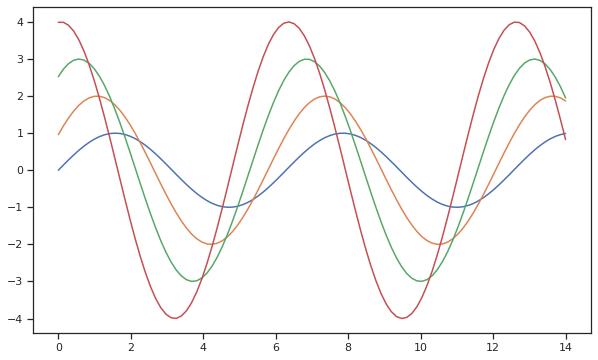

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5) 
y3 = 3 * np.sin(x+1.0) 
y4 = 4 * np.sin(x+1.5) 

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

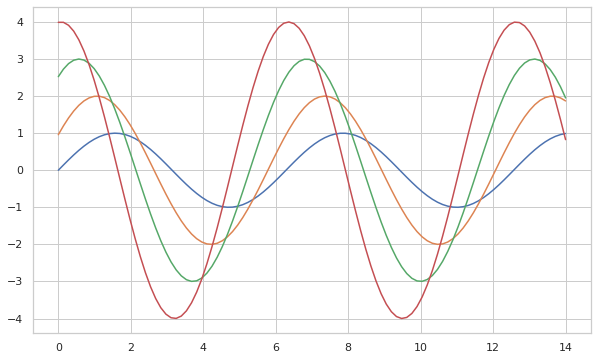

In [51]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [53]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


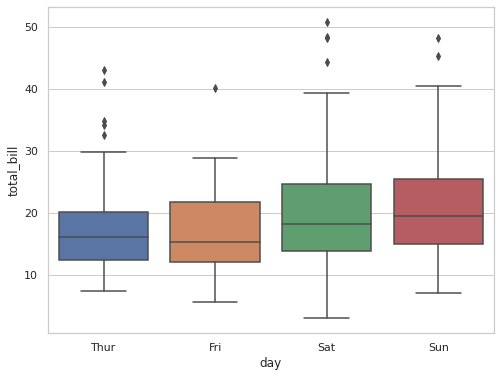

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

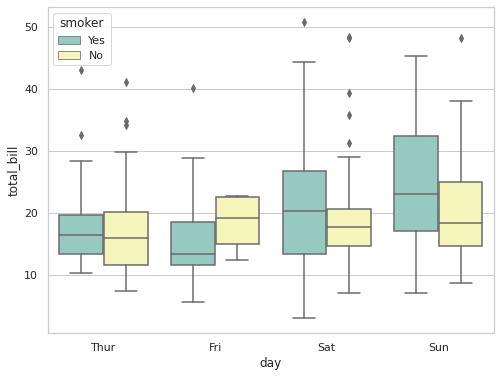

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", hue= "smoker", data=tips, palette = "Set3")
plt.show()

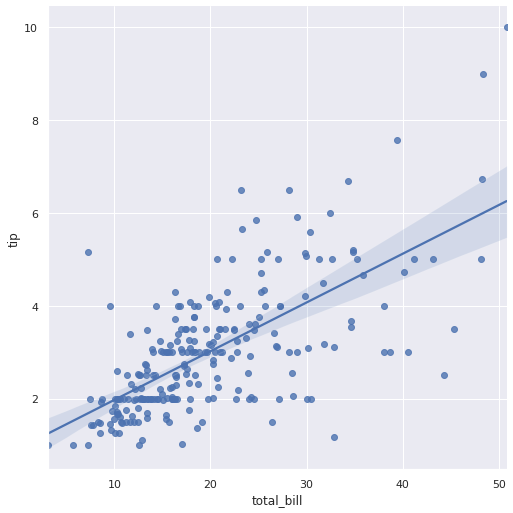

In [56]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7)
plt.show()

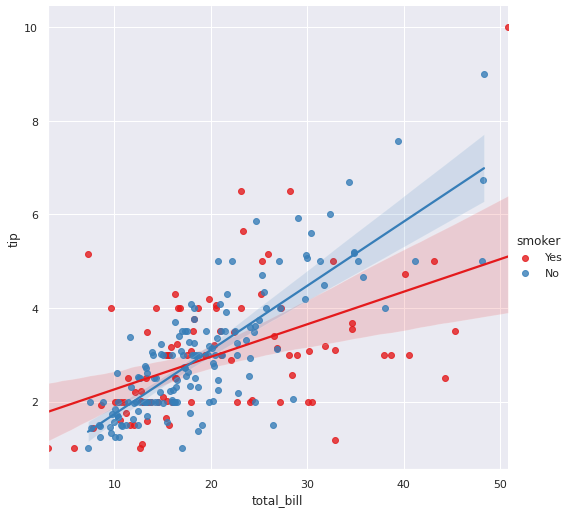

In [57]:
sns.lmplot(x="total_bill", y="tip", hue= "smoker", data=tips, palette= "Set1", height=7)
plt.show()

In [58]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [59]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [60]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


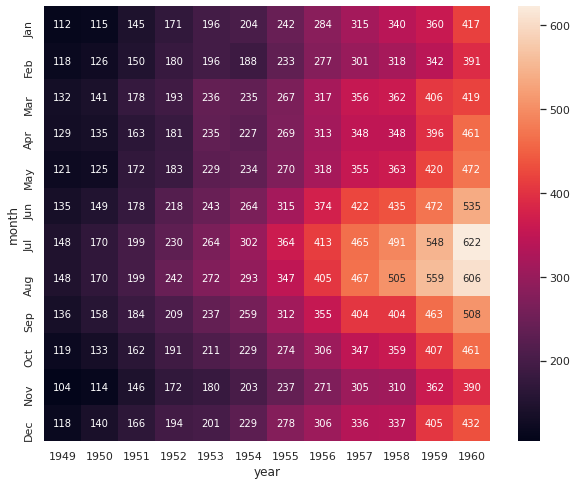

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot=True, fmt= 'd')
plt.show()

In [62]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


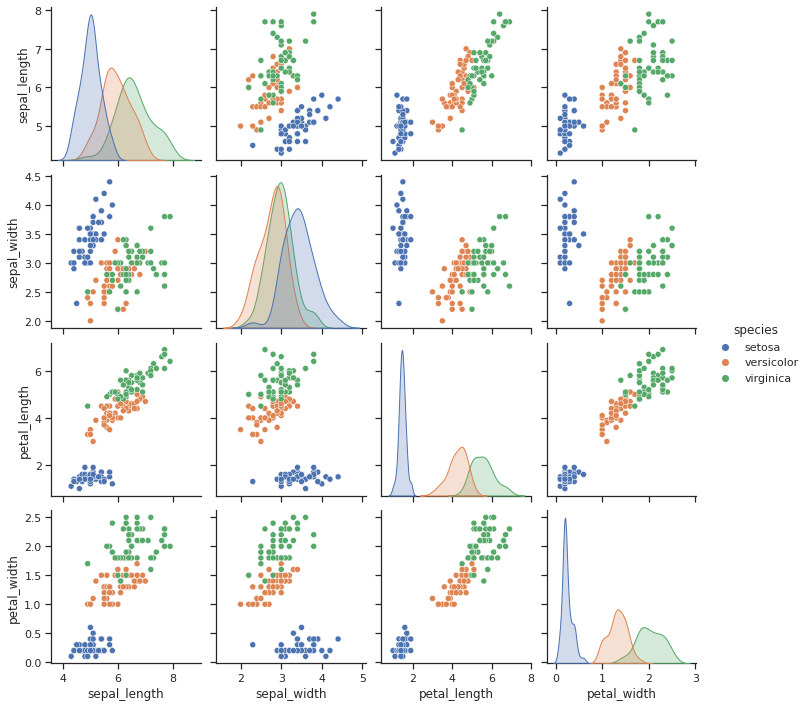

In [63]:
sns.pairplot(iris, hue='species')
plt.show()

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matpl

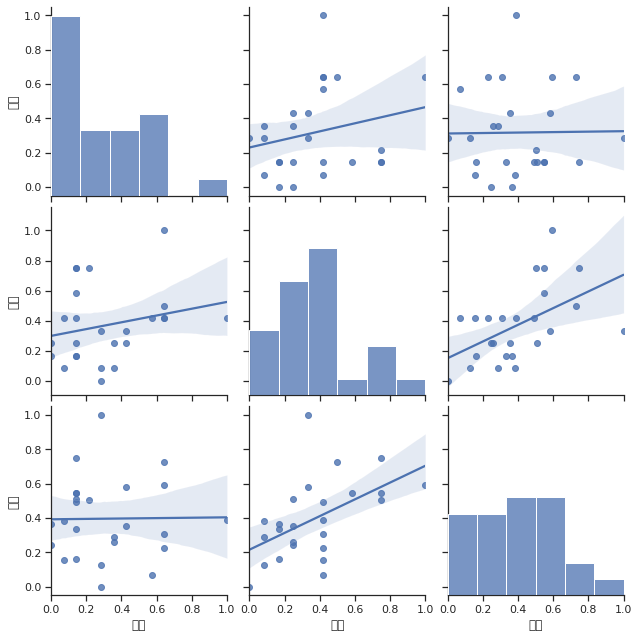

In [65]:
sns.pairplot(cn, vars=["강도", "살인", "폭력"], kind='reg', size=3)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matpl

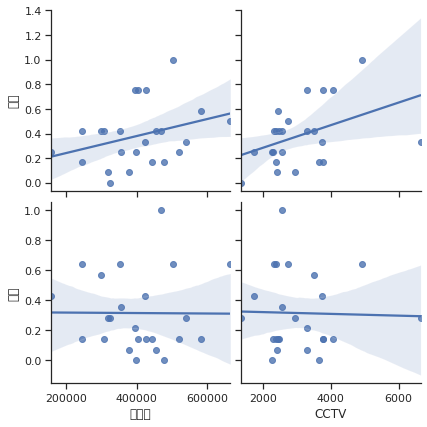

In [66]:
sns.pairplot(cn, x_vars=["인구수", "CCTV"], y_vars=["살인", "강도"], kind='reg', size=3)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matpl

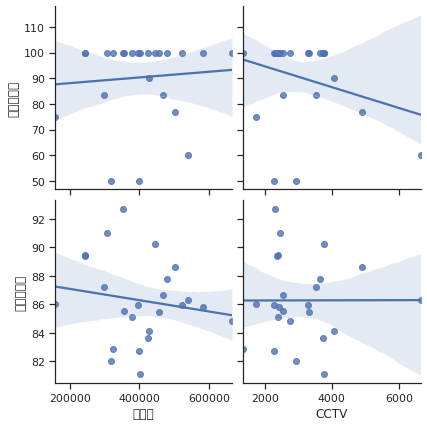

In [67]:
sns.pairplot(cn, x_vars=["인구수", "CCTV"], y_vars=["살인검거율", "폭력검거율"], kind='reg', size=3)
plt.show()

In [69]:
tmp_max=cn['검거'].max()
cn['검거'] = cn['검거']/tmp_max*100
cn_s = cn.sort_values(by='검거', ascending = False)
cn_s.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
은평구,0.180556,0.000000,0.166667,0.355505,0.366557,83.505155,100.0,100.0,62.428115,87.795648,479607.0,3660.0,1.069284,100.000000
성북구,0.149306,0.142857,0.166667,0.133945,0.158979,73.863636,100.0,100.0,67.560074,90.248447,444295.0,3754.0,0.751753,99.525796
용산구,0.315972,0.142857,0.166667,0.095872,0.334020,87.132353,100.0,100.0,54.454454,89.484029,243336.0,2383.0,1.055387,99.387156
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,92.222222,100.0,100.0,49.873418,82.843137,323752.0,1356.0,0.285714,97.973356
강서구,0.375000,0.142857,0.583333,0.577982,0.548188,83.986928,100.0,100.0,52.536585,85.792564,582804.0,2437.0,2.227360,97.368670


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

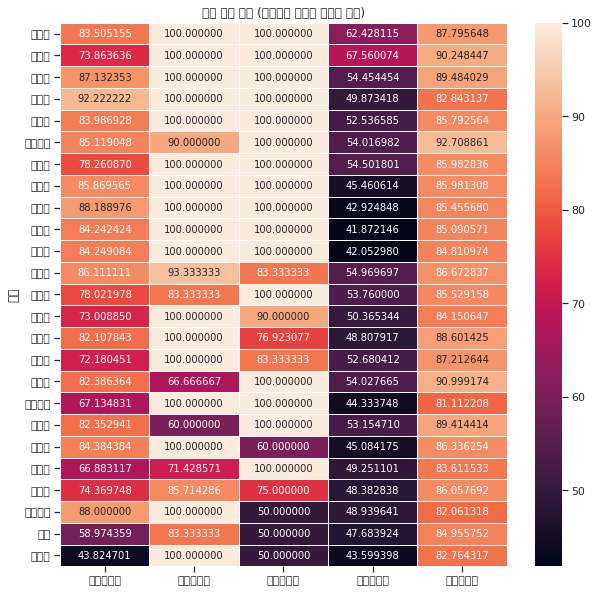

In [71]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

cn_s = cn.sort_values(by='검거', ascending = False)
plt.figure(figsize=(10, 10))
sns.heatmap(cn_s[col], annot=True, fmt='f', linewidths=.5)
plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/back

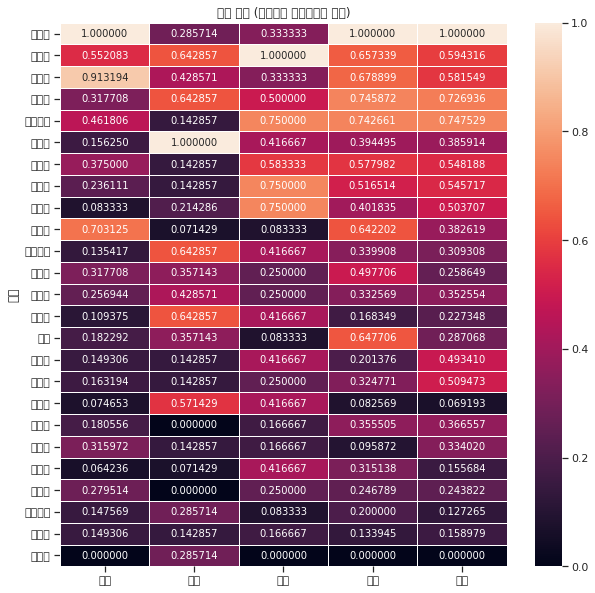

In [72]:
col = ['강간', '강도', '살인', '절도', '폭력']

cn['범죄'] = cn['범죄']/5
cn_s = cn.sort_values(by='범죄', ascending = False)
plt.figure(figsize=(10, 10))
sns.heatmap(cn_s[col], annot=True, fmt='f', linewidths=.5)
plt.title("범죄 비율 (정규화된 발생건수로 정렬)")
plt.show()

In [73]:
import folium

In [75]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [76]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen

In [77]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles= 'Stamen Toner', zoom_start=13)
stamen

In [83]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles= 'Stamen Toner', zoom_start=13)
folium.Marker([45.5236, -122.6750], popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5236, -122.6750], radius= 50,
                   popup='Laurelhurst Park', color='#3186cc',
                   fill_color='#3186cc', ).add_to(map_2)
map_2

In [84]:
import folium
import pandas as pd

In [85]:
su = '02. folium_US_Unemployment_Oct2012.csv'

sd = pd.read_csv(su)
sd.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [88]:
sg = '02. folium_us-states.json'

map1 = folium.Map(location=[40, -98], zoom_start=4)
map1.choropleth(geo_data = sg, data=sd,
            columns= ['State', 'Unemployment'],
            key_on = 'feature.id',
            fill_color='YlGn',
            legend_name='Unemployment Rate (%)')
map1

In [91]:
import json

gp = '02. skorea_municipalities_geo_simple.json'
gs= json.load(open(gp, encoding='utf-8'))

In [92]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map1.choropleth(geo_data = gs, data=cn['살인'],
            columns= [cn.index, cn['살인']],
            fill_color='PuRd',
            key_on='feature.id')
map1

In [93]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map1.choropleth(geo_data = gs, data=cn['강간'],
            columns= [cn.index, cn['강간']],
            fill_color='PuRd',
            key_on='feature.id')
map1

In [94]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map1.choropleth(geo_data = gs, data=cn['범죄'],
            columns= [cn.index, cn['범죄']],
            fill_color='PuRd',
            key_on='feature.id')
map1

In [97]:
tc = cn['살인']/ cn['인구수'] * 1000000
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map1.choropleth(geo_data = gs, data=tc,
            columns= [cn.index, tc],
            fill_color='PuRd',
            key_on='feature.id')
map1

In [106]:
station_lat = [37.5636465,
               37.5755578,
               37.5547584,
               37.5647848,
               37.5718401,
               37.5411211,
               37.5897271,
               37.58506149999999,
               37.550814,
               37.5257884,
               37.5617309,
               37.5130685,
               37.542873,
               37.6128611,
               37.6373881,
               37.4814051,
               37.618692,
               37.5094352,
               37.4743789,

               37.5257884,
               37.5617309,
               37.5130685,
               37.542873,
               37.6128611,
               37.6373881,
               37.4814051,
               37.618692,
               37.5094352,
               37.4743789,
               
               37.5130685,
               37.542873,
              ]

station_lng = [126.9895796,
              126.9848674,
              126.9734981,
              126.9667762,
              126.9988562,
              126.9676935,
              127.0161318,
              127.0457679,
              126.954028,
              126.901006,
              127.0363806,
              126.9428078,
              127.083821,
              126.9274951,
              127.0273238,
              126.9099508,
              127.1047136,
              127.0669578,
              126.9509748,

              126.9667762,
              126.9988562,
              126.9676935,
              127.0161318,
              127.0457679,
              126.954028,
              126.901006,
              127.0363806,
              126.9428078,
              127.083821,
              127.0457679,
              126.954028,

              ]

cp_raw['lat'] = station_lat
cp_raw['lng'] = station_lng

col = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
tmp = cp_raw[col]/cp_raw[col].max()

cp_raw['검거'] = np.sum(tmp, axis = 1)

In [107]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

for n in cp_raw.index:
    folium.Marker([cp_raw['lat'][n], cp_raw['lng'][n]]).add_to(map1)
map1

In [109]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

for n in cp_raw.index:
    folium.Marker([cp_raw['lat'][n], cp_raw['lng'][n]]).add_to(map1)
    folium.CircleMarker([cp_raw['lat'][n], cp_raw['lng'][n]],
                       radius = cp_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc'
                       ).add_to(map1)
map1

In [110]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')


map1.choropleth(geo_data = gs, data=cn['범죄'],
            columns= [cn.index, cn['범죄']],
            fill_color='PuRd',
            key_on='feature.id')

for n in cp_raw.index:
#     folium.Marker([cp_raw['lat'][n], cp_raw['lng'][n]]).add_to(map1)
    folium.CircleMarker([cp_raw['lat'][n], cp_raw['lng'][n]],
                       radius = cp_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc'
                       ).add_to(map1)
map1

/srv/conda/envs/notebook/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
